In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df = bank_data.drop('ZIP Code', axis=1)

In [4]:
df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [5]:
df.mean()

ID                    2500.500000
Age                     45.338400
Experience              20.104600
Income                  73.774200
Family                   2.396400
CCAvg                    1.937913
Education                1.881000
Mortgage                56.498800
Personal Loan            0.096000
Securities Account       0.104400
CD Account               0.060400
Online                   0.596800
CreditCard               0.294000
dtype: float64

In [6]:
df.median().T

ID                    2500.5
Age                     45.0
Experience              20.0
Income                  64.0
Family                   2.0
CCAvg                    1.5
Education                2.0
Mortgage                 0.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [10]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#Univariate Analysis

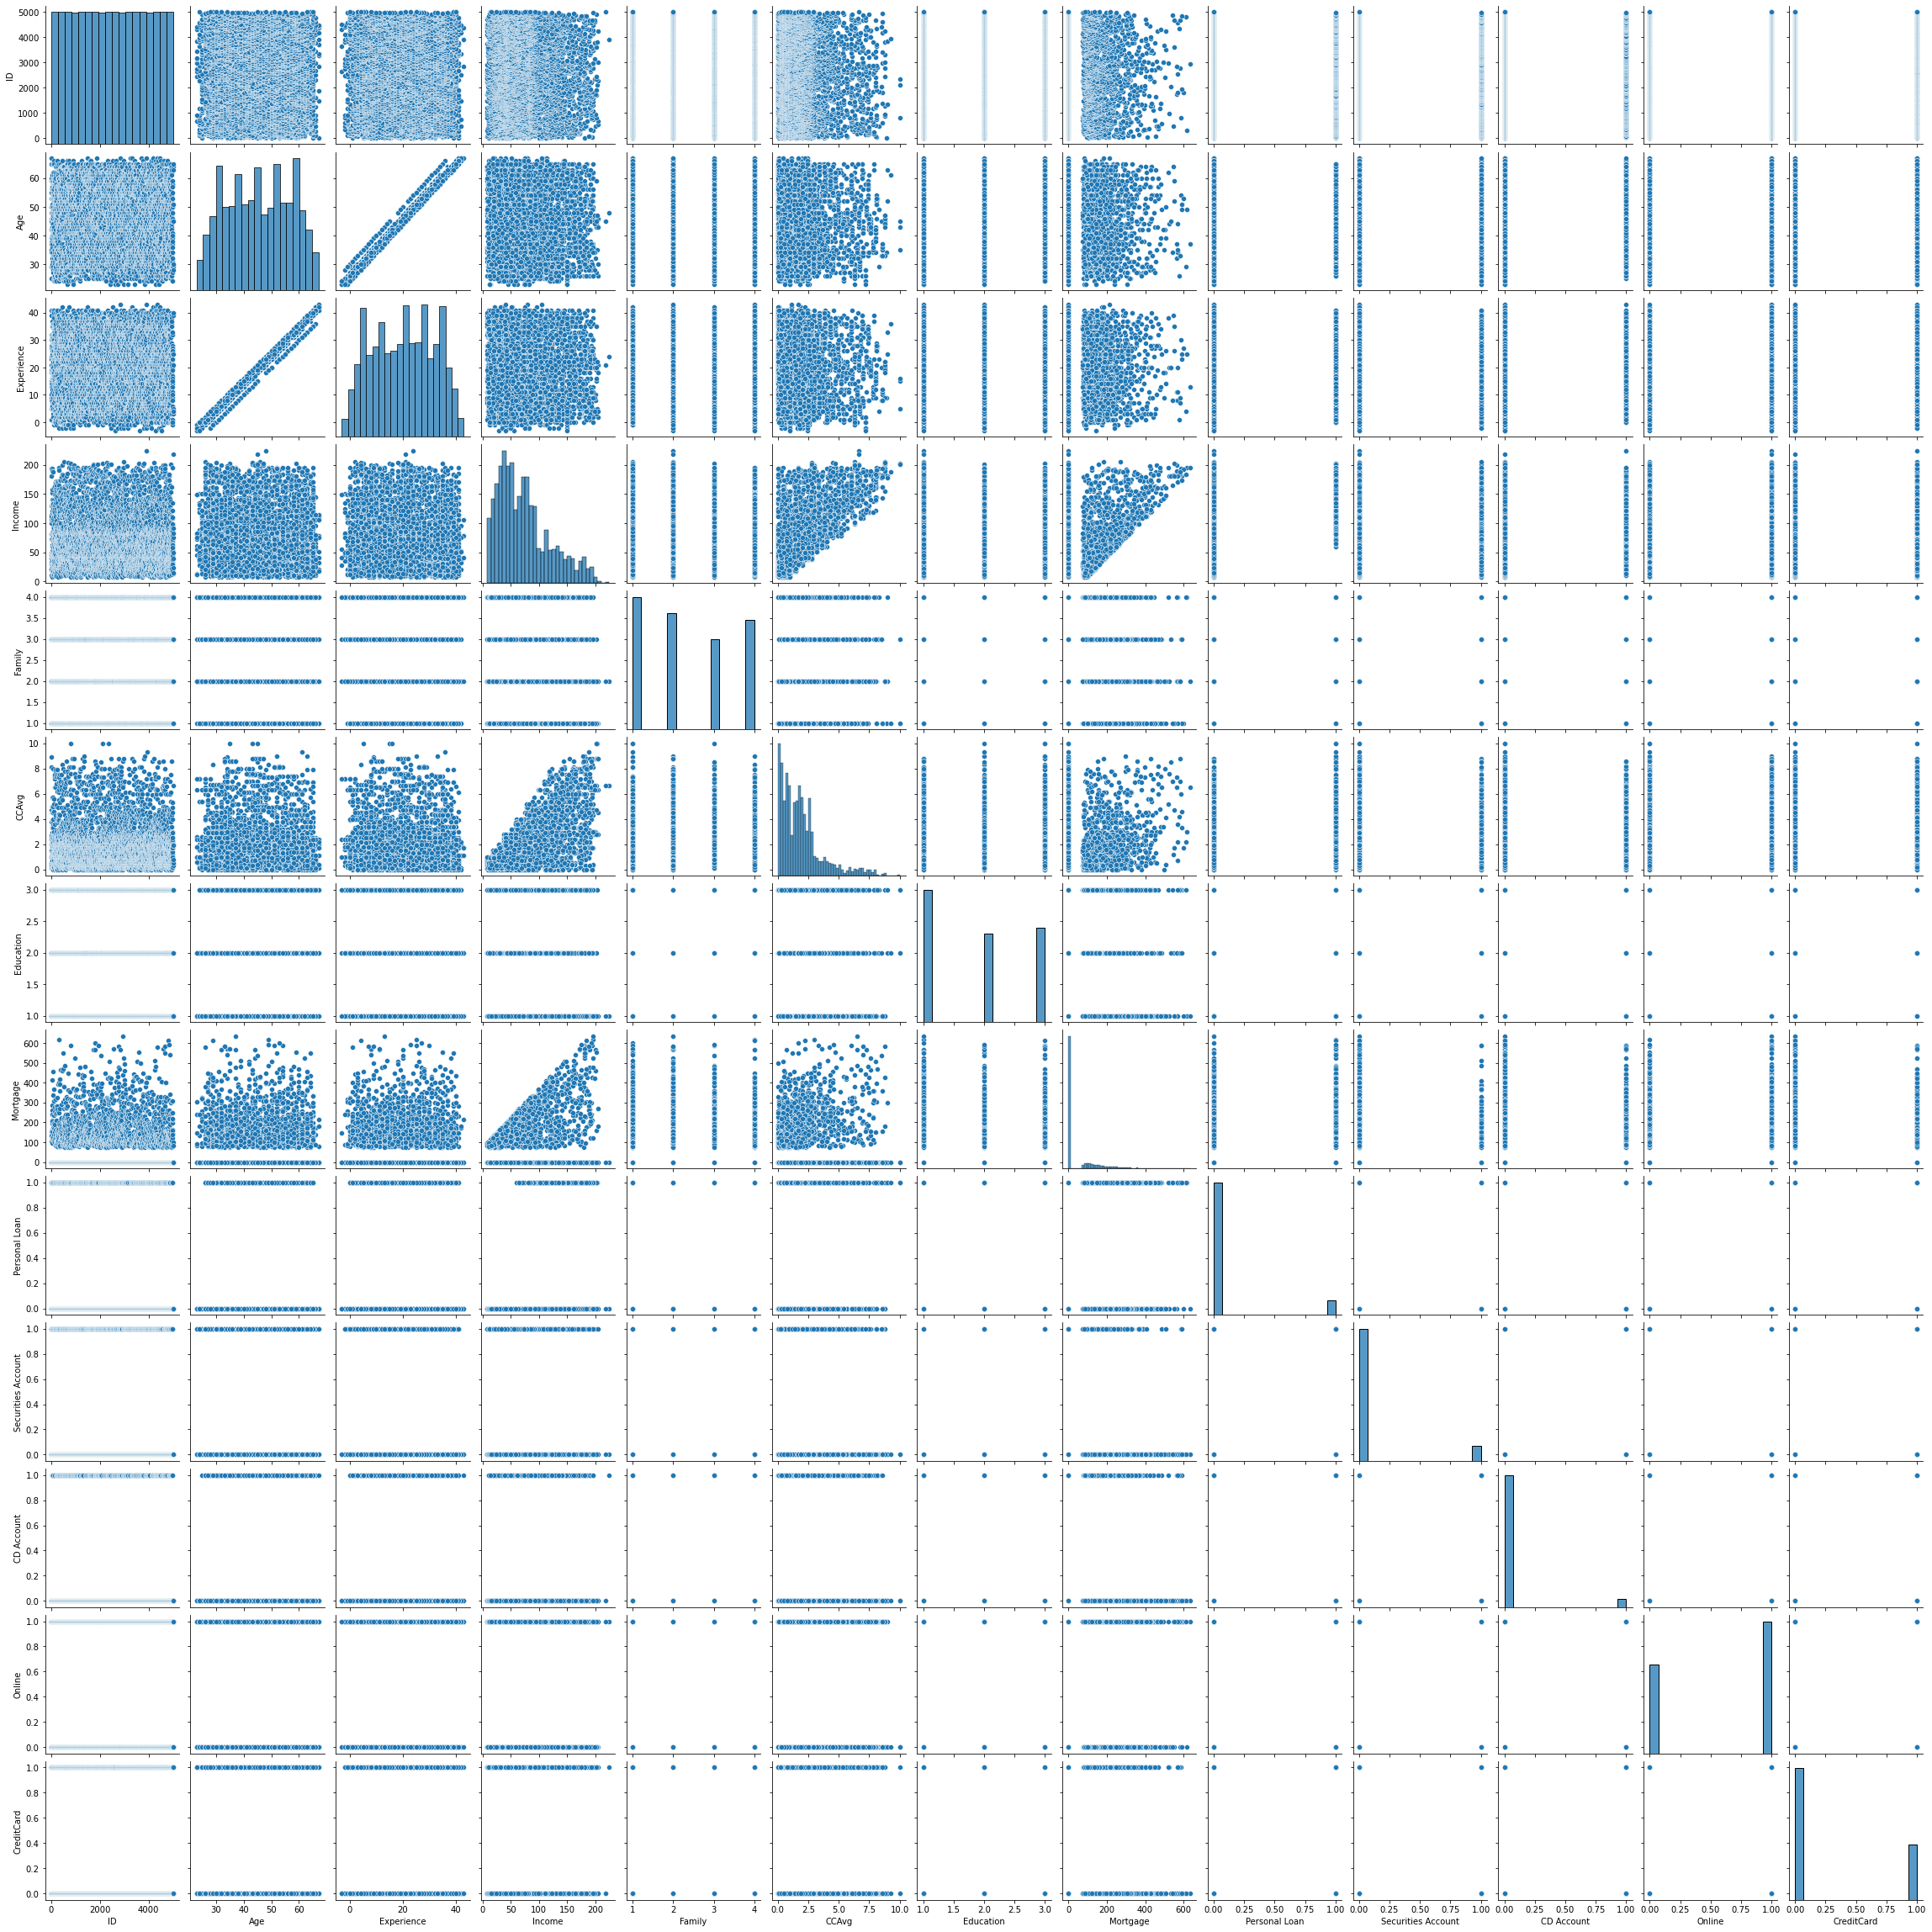

In [12]:
sns.pairplot(df)

In [13]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x229a78c6430>,
 'caps': [<matplotlib.lines.Line2D at 0x229a78c6af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229a78c60d0>],
 'medians': [<matplotlib.lines.Line2D at 0x229a78ca1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229a78ca550>],
 'means': []}

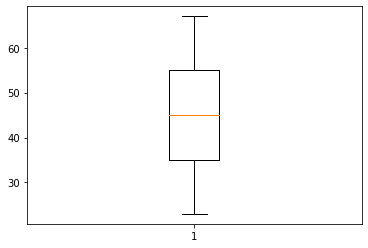

In [14]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x229a79016d0>,
 'caps': [<matplotlib.lines.Line2D at 0x229a7901d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x229a7901370>],
 'medians': [<matplotlib.lines.Line2D at 0x229a790a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x229a790a7f0>],
 'means': []}

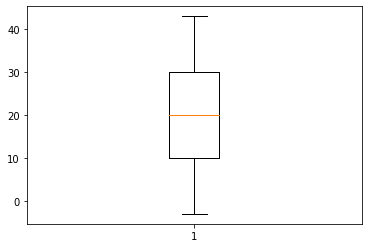

In [15]:
plt.boxplot(df['Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x229a793adf0>,
 'caps': [<matplotlib.lines.Line2D at 0x229a79454f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229a793aa90>],
 'medians': [<matplotlib.lines.Line2D at 0x229a7945bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229a7945f10>],
 'means': []}

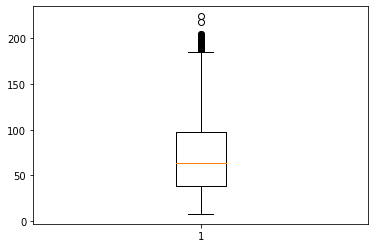

In [16]:
plt.boxplot(df['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x229a798c550>,
 'caps': [<matplotlib.lines.Line2D at 0x229a798cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x229a798c1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x229a7997310>],
 'fliers': [<matplotlib.lines.Line2D at 0x229a7997670>],
 'means': []}

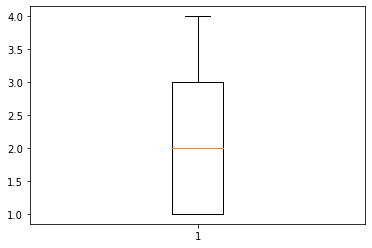

In [17]:
plt.boxplot(df['Family'])

{'whiskers': [<matplotlib.lines.Line2D at 0x229a79e8610>,
 'caps': [<matplotlib.lines.Line2D at 0x229a79e8cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229a79e82b0>],
 'medians': [<matplotlib.lines.Line2D at 0x229a79f33d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229a79f3730>],
 'means': []}

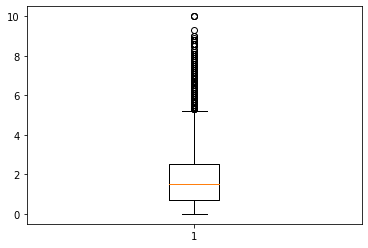

In [18]:
plt.boxplot(df['CCAvg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x229a7a44220>,
 'caps': [<matplotlib.lines.Line2D at 0x229a7a448e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229a7a35e80>],
 'medians': [<matplotlib.lines.Line2D at 0x229a7a44fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229a7a50340>],
 'means': []}

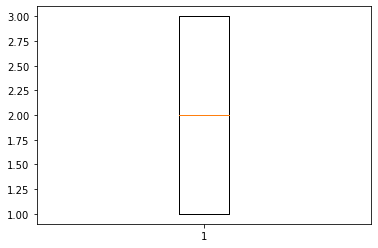

In [19]:
plt.boxplot(df['Education'])

{'whiskers': [<matplotlib.lines.Line2D at 0x229a7a9bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x229a7aab370>,
 'boxes': [<matplotlib.lines.Line2D at 0x229a7a9b970>],
 'medians': [<matplotlib.lines.Line2D at 0x229a7aaba30>],
 'fliers': [<matplotlib.lines.Line2D at 0x229a7aabd90>],
 'means': []}

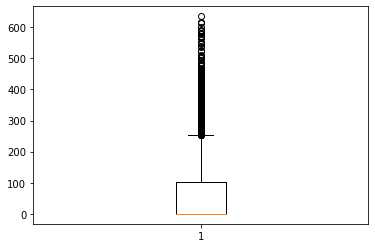

In [20]:
plt.boxplot(df['Mortgage'])

<AxesSubplot:xlabel='Family', ylabel='count'>

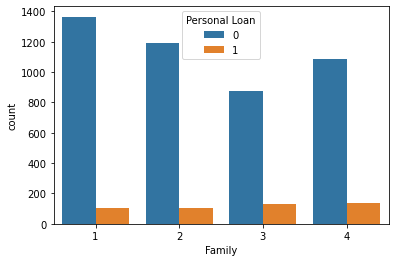

In [21]:
#bivariate analysis
sns.countplot(x=df['Family'], hue = df['Personal Loan'])

<AxesSubplot:xlabel='Education', ylabel='count'>

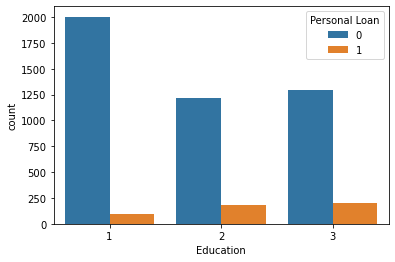

In [22]:
#bivariate analysis
sns.countplot(x=df['Education'], hue = df['Personal Loan'])

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

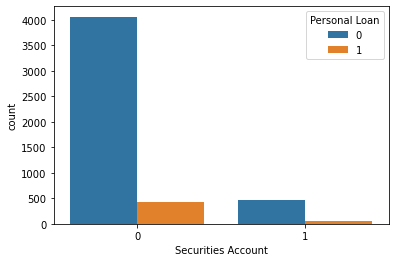

In [23]:
#bivariate analysis
sns.countplot(x=df['Securities Account'], hue = df['Personal Loan'])

<AxesSubplot:xlabel='CD Account', ylabel='count'>

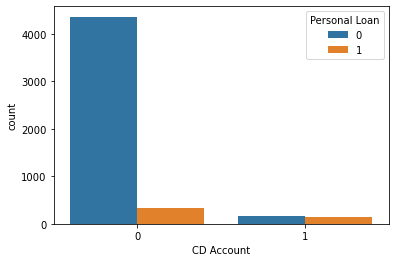

In [24]:
sns.countplot(x=df['CD Account'], hue = df['Personal Loan'])

<AxesSubplot:xlabel='Online', ylabel='count'>

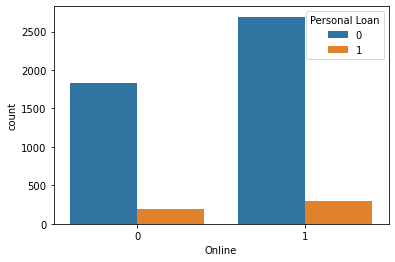

In [25]:
sns.countplot(x=df['Online'], hue = df['Personal Loan'])

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

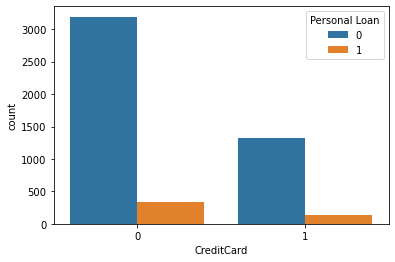

In [26]:
sns.countplot(x=df['CreditCard'], hue = df['Personal Loan'])

In [50]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [70]:
Y= df['Personal Loan']
X= df [['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online','CreditCard']]

In [75]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
logistic = sm.Logit(Y,X1)
result = logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                  0.5938
Time:                        04:51:07   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

**Solution:**
 From the above summary we can see that:
    Income,
     Family,
     Education,
    CD Account,
    Online, 
    Credit Card:are the most significant values to make model with.